In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [358]:
df = pd.read_csv('housing_data.csv')
def floor_type(row):
    fl = row['Qavati']
    tot = row['Uy qavatliligi']
    if fl == 1 :
        return 'first'
    if fl == tot :
        return 'last'
    else :
        return 'middle'
df['Qavat_turi'] = df.apply(floor_type, axis=1)

df2 = df2.drop(columns=[ 'Qavati', 'Uy qavatliligi',], errors='ignore')

In [359]:
df['Qavat_turi'] = df.apply(floor_type, axis=1)

df2 = pd.get_dummies(df, columns=['Qavat_turi','Turarjoy turi','Tuman','Xonalar soni'])

df2 = df2.replace({
    'Yangi qurilgan uylar' : 1,
    'Ikkilamchi bozor':0,
    True: 1,
    False: 0,
    'Ha': 1,
    'Yoʻq': 0
})

df2 = df2.drop(columns=[ 'Qavati', 'Uy qavatliligi',], errors='ignore')



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7700\3466906608.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({


In [360]:
numeric_columns = ['Xonalar soni','Umumiy maydon','Qavati']

In [361]:
df2

,Umumiy maydon,Mebelli,Narx,Qavat_turi_first,Qavat_turi_last,Qavat_turi_middle,Turarjoy turi_Ikkilamchi bozor,Turarjoy turi_Yangi qurilgan uylar,Tuman_Bektemir,Tuman_Chilonzor,...,Tuman_Yunusobod,Xonalar soni_1,Xonalar soni_2,Xonalar soni_3,Xonalar soni_4,Xonalar soni_5,Xonalar soni_6,Xonalar soni_7,Xonalar soni_8,Xonalar soni_60
0,95.0,1,165,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,76.0,1,185,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,74.0,1,184,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,52.0,0,56,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,70.0,0,170,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,40.0,1,69,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1173,45.0,1,55,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1174,46.0,1,80,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1175,28.0,0,19,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [362]:
X = df2.drop(columns=['Narx']).values
y = df2['Narx'].values
df2

,Umumiy maydon,Mebelli,Narx,Qavat_turi_first,Qavat_turi_last,Qavat_turi_middle,Turarjoy turi_Ikkilamchi bozor,Turarjoy turi_Yangi qurilgan uylar,Tuman_Bektemir,Tuman_Chilonzor,...,Tuman_Yunusobod,Xonalar soni_1,Xonalar soni_2,Xonalar soni_3,Xonalar soni_4,Xonalar soni_5,Xonalar soni_6,Xonalar soni_7,Xonalar soni_8,Xonalar soni_60
0,95.0,1,165,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,76.0,1,185,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,74.0,1,184,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,52.0,0,56,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,70.0,0,170,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,40.0,1,69,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1173,45.0,1,55,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1174,46.0,1,80,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1175,28.0,0,19,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [363]:

y.shape

(1177,)

In [364]:
X.shape

(1177, 27)

In [365]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [367]:

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 68.10884611784903
Coefficients: [  0.73670382  18.13059164  -8.74851599   0.60423398   8.14428202
  -6.64609693   6.64609693  27.55576776 -14.45466911  28.40179723
  -8.4579123  -38.03367078  18.5102971  -43.60726642  59.64595169
  -3.6120423   -8.79475391 -17.15349895 -42.16722243 -31.63681434
 -15.01435284 -25.15677087   3.64970458  22.31340277   0.
 127.63683281 -39.62477969]


In [368]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))


MSE: 3296.700261658126
R² Score: 0.4175059990972453


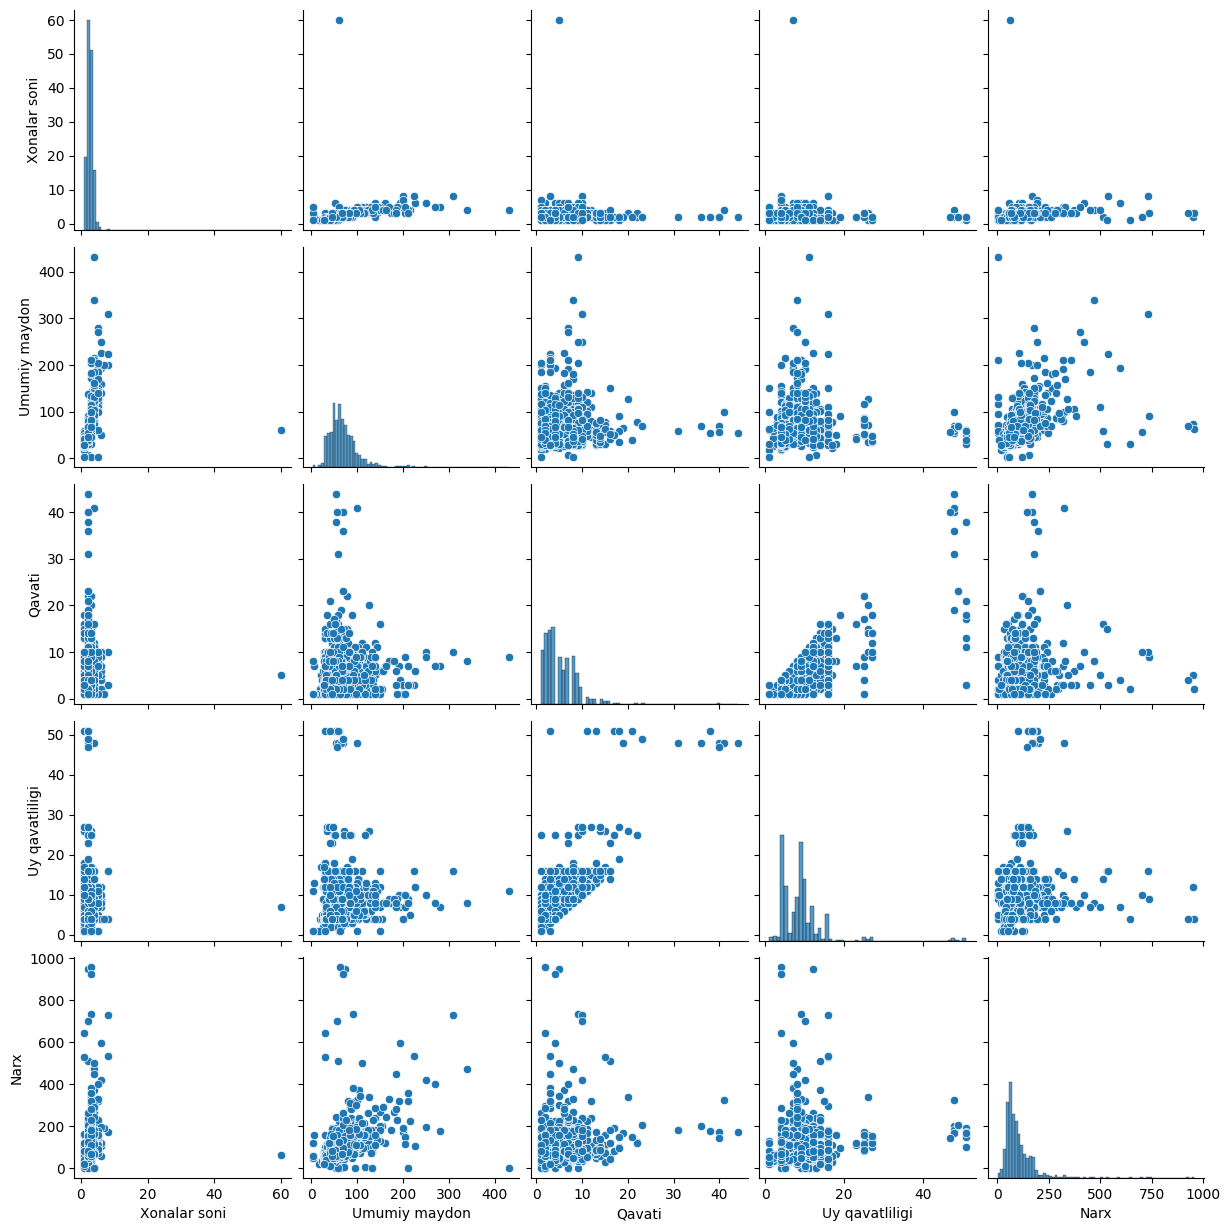

In [369]:
import seaborn as sns
sns.pairplot(df)  # Replace df with your DataFrame
